# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import math
import scipy

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
print(df.head())
print(df.describe())
print(df.info())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


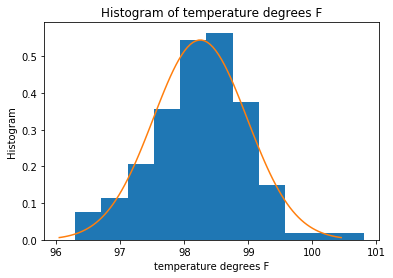

In [4]:
_ = plt.hist(df.temperature, bins=11, normed=True) # 11 bins from sqrt 130 samples
_ = plt.xlabel('temperature degrees F')
_ = plt.ylabel('Histogram')
_ = plt.title('Histogram of temperature degrees F')

mu = 98.25
sigma = 0.733
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
_ = plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.show()

1. Is the distribution of body temperatures normal?
The histogram of body temperature is roughly normally distbuted

2. Is the sample size large? Are the observations independent?
We have 130 samples. If our population is humanity which is approximately 6 billion people on earth then with 130 samples we get between a 5-10% margin of error at 95% confidence level from [Sample Size Calulation](https://help.surveymonkey.com/articles/en_US/kb/How-many-respondents-do-I-need)

The data was gathered from an article in the [*Journal of the American Medical Association* entitled "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich"](https://www.ncbi.nlm.nih.gov/pubmed/1302471) 

The article states the observations were gathered one to four times daily for 3 consecutive days using an electronic digital thermometer. The observations do not appear have any inherent dependency. If they used the same thermometer and did one measurement after another and did not wait a sufficient amount of time to allow the thermometer to reach equilibrium then there is a possible dependency, but this is unlikely to be the case.

In [25]:
print(df.groupby('gender').count())
z_score = (mu-98.6) / (sigma / np.sqrt(130))
print('z_score: ',z_score)

        temperature  heart_rate
gender                         
F                65          65
M                65          65
z_score:  -5.44422099297


3. Is the true population mean really 98.6 degrees F?
It seems unlikely as from the sample set the chance of 98.6 degrees F occurs less than 5.45 sigma of the time. 

Would you use a one-sample or two-sample test? Why?
We can use a one-sample test to compare the mean of 98.2 to the population as there is a 50/50 ratio of male to female in the 
sample set which matches 50/50 population. 

In this situation, is it appropriate to use the  tt  or  zz  statistic?
It's appropriate to use either the Z statistic or T statistic as we have sufficient samples > 30 so the T statistic distribution will match the Z statistics distribution which is normal.

Now try using the other test. How is the result be different? Why?
Z score is -5.44 Sigma while the T score is 5.45 with 129 degrees of freedom. 

The results are different as the Z statistic uses a normal distribution while the T statistic uses the student-T distribution. However in this case the difference is negibile as we are at the very extremes of the long tails and we have more than 30 samples so the student-T distribution converges to the normal.

In [5]:
bs_sample = np.random.choice(df.temperature, 10)
mu_10 = np.mean(bs_sample)
sigma_10 = np.std(bs_sample)
t_statistic = (mu_10-98.6) / (sigma_10 / np.sqrt(10))
print('t_statistic: ',t_statistic)

t_statistic:  0.708100988183


4. Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
Here the t-statistic is the correct one to use as we have a sample size < 10 so the t distribution will not be close to normal.

What do you notice? 
T-Score is 3 sigma away instead of 5.45.

What does this tell you about the difference in application of the  tt and  zz  statistic?
Z_score is better used with > 30 samples while T-score is better used with < 30 samples

In [11]:
z = 1.96 # 95% confidence interval
margin_of_error = 1.96 * sigma / np.sqrt(130)
lower_95 = mu - margin_of_error
upper_95 = mu + margin_of_error
print('Margin of error: ', margin_of_error)
print('Upper bound: ', upper_95)
print('Lower bound: ', lower_95)

Margin of error:  0.126005171518
Upper bound:  98.3760051715
Lower bound:  98.1239948285


5. At what temperature should we consider someone's temperature to be "abnormal"? Start by computing the margin of error and confidence interval.

Assuming a 95% confidence interval the range of values from we can consider someone's temperature to be abnormal is above 98.38 and below 98.12

In [15]:
mu_male = np.mean(df.temperature.loc[df.gender == 'M'])
sigma_male = np.std(df.temperature.loc[df.gender == 'M'])
mu_female = np.mean(df.temperature.loc[df.gender == 'F'])
sigma_female = np.std(df.temperature.loc[df.gender == 'F'])
print(mu_male, sigma_male, mu_female, sigma_female)

98.1046153846154 0.6933598841828696 98.39384615384613 0.7377464486428966


In [28]:
# There is overlap within 1 sigma between the means. 
# Further investigation using permutation replicates to test null hypothesis

# Permutation sample function random reordering of entries in an array
def permutation_sample(array1, array2):
    concat_array = np.concatenate((array1, array2))
    permutation = np.random.permutation(concat_array)
    new_array1 = permutation[:len(array1)]
    new_array2 = permutation[len(array2):]
    return new_array1, new_array2

# Permutation Replicates function on 2 arrays data_1 and data_2
# Running function func with number of runs equal to size
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample from permutation sample function
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

# Difference of means between 2 arrays data_1 and data_2
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Calculate sample mean differences to be used for calculating p-value
empirical_diff_means = mu_male - mu_female

# Seperate male and female temperatures in order to run permutation
male_temperature = df.temperature.loc[df.gender == 'M']
female_temperature = df.temperature.loc[df.gender == 'F']

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male_temperature, female_temperature,
                                 diff_of_means, size=10000)

#Calculate p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

p-value = 0.988


6. Is there a significant difference between males and females in normal temperature? What test did you use and why? Write a story with your conclusion in the context of the original problem.

Our question is whether male and females have a significantly different normal temperatures. 

Data was gathered by taking temperature measurements one to four times daily for 3 consecutive days using an electronic digital thermometer on males and females.  We gathered 65 male and 65 female temperature readings.

Our null hypothesis is that male and female normal temperatures are the same. We will use the mean of the male and female temperature readings as the normal temperature. Therefore our test statistic will be the difference between male and female mean temperatures. 

We combined the male and female temperature readings into 1 array assuming they are the same. We ran 10,000 permutation samples. For each sample we pulled 65 random values from the array as male and 65 as female. We calculated the difference means of between male and female arrays for the 10,000 samples. We calculated the p-value of the permutations with a difference of means greater than our sample mean set. We find a p-value of 0.988 meaning that we can expect to see the difference of means for our sample mean set 98.8% of the time under null hypothesis. It is highly likely that male and female temperatures are not sigificantly different and are the same